In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Do not display future warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
war = pd.read_csv('../data/war.csv')
politic = pd.read_csv('../data/politics.csv')

In [3]:
war.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,media_metadata,media,media_embed,secure_media,secure_media_embed,gallery_data,is_gallery,author_flair_background_color,author_flair_text_color,edited
0,0,[],False,leontynenillvmf,NaN,[],NaN,text,t2_whbbu,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,No_Preference1784,NaN,[],NaN,text,t2_6guo0i3l,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,babadock55555,NaN,[],NaN,text,t2_7f9y442a,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,cyberdbs,NaN,[],NaN,text,t2_ebeocmcj,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,Pires89,NaN,[],NaN,text,t2_e9sezmpn,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
politic.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,link_flair_css_class,media,media_embed,secure_media,secure_media_embed,author_flair_background_color,crosspost_parent,crosspost_parent_list,author_cakeday,distinguished
0,0,[],False,pianoboy8,newyork-flag,"[{'a': ':flag-ny:', 'e': 'emoji', 'u': 'https:...",bd600206-8e72-11e6-bf04-0ee844677561,:flag-ny: New York,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,hundredfooter,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,AceCombat9519,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,yaxxxi,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,porlalibrenoticias,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
war.columns

Index(['Unnamed: 0', 'all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'media_only', 'no_follow', 'num_comments', 'num_crossposts',
       'over_18', 'parent_whitelist_status', 'permalink', 'pinned',
       'post_hint', 'preview', 'pwls', 'removed_by_category', 'retrieved_on',
       'score', 'selftext', 'send_replies', 'spoiler', 'stickied', 'subreddit',
       'subreddit_id', 'subreddit_subscribers

In [6]:
politic.columns

Index(['Unnamed: 0', 'all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_is_blocked', 'author_patreon_flair', 'author_premium',
       'awarders', 'can_mod_post', 'contest_mode', 'created_utc', 'domain',
       'full_link', 'gildings', 'id', 'is_created_from_ads_ui',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'post_hint',
       'preview', 'pwls', 'retrieved_on', 'score', 'selftext', 'send_replies',
       'spoiler', 'stickied', 'subreddit',

In [7]:
war = war [['subreddit', 'title', 'selftext']]
war.head()

,subreddit,title,selftext
0,war,Los Cabos Real Estate | Oceanside Real Estate ...,NaN
1,war,"caption contest,cant wait to see your input!",NaN
2,war,how modern light infantry operate?,hi\n\nhow modern light infantry operate?\n\nth...
3,war,The history and development of weaponry in Gaz...,NaN
4,war,"Outbreak of WW1, freshly mobilized soldiers in...",NaN


In [8]:
politic = politic[['subreddit', 'title', 'selftext']]
politic.head()

,subreddit,title,selftext
0,politics,She’s One Of Congress’s Leading Progressives —...,NaN
1,politics,God Help Us If This Is the Birth of Another Te...,NaN
2,politics,Doctor laments GOP not recognizing ‘simple way...,NaN
3,politics,Republicans haven't raised much money in their...,NaN
4,politics,Noticias de Chihuahua.- Residentes del fraccio...,NaN


subreddit      0
title          0
selftext     877
dtype: int64


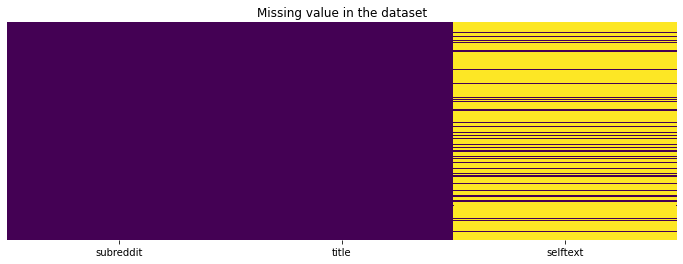

In [9]:
# Let's look at the null values in a heatmap to get an overview
plt.figure(figsize=(12,4))
sns.heatmap(war.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

print(war.isnull().sum())

subreddit       0
title           0
selftext     1084
dtype: int64


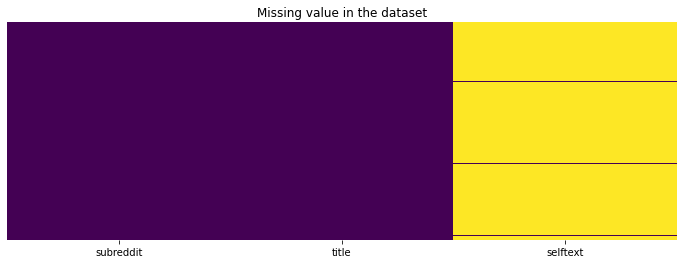

In [10]:
# Let's look at the null values in a heatmap to get an overview
plt.figure(figsize=(12,4))
sns.heatmap(politic.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

print(politic.isnull().sum())

In [11]:
#datascience.drop(datascience.index[datascience['selftext'] == '[removed]'],inplace = True)
war['selftext'] = war['selftext'].fillna('')
war.isnull().sum()

subreddit    0
title        0
selftext     0
dtype: int64

In [12]:
war.shape

(1100, 3)

In [13]:
politic['selftext'] = politic['selftext'].fillna('')
politic.isnull().sum()

subreddit    0
title        0
selftext     0
dtype: int64

In [14]:
politic.shape

(1100, 3)

In [15]:
war['title']= war['title'].str.lower()
war['selftext']= war['selftext'].str.lower()
politic['title']= politic['title'].str.lower()
politic['selftext']= politic['selftext'].str.lower()

### Preprocessing - Remove html tags and punctuation using regex

In [16]:
war['title'] = war['title'].str.replace("[^a-zA-Z]", " ")

In [17]:
war['selftext'] = war['selftext'].str.replace("[^a-zA-Z]", " ")

In [18]:
politic['title'] = politic['title'].str.replace("[^a-zA-Z]", " ")

In [19]:
politic['selftext'] = politic['selftext'].str.replace("[^a-zA-Z]", " ")

In [20]:
politic['selftext']

0        
1        
2        
3        
4        
       ..
1095     
1096     
1097     
1098     
1099     
Name: selftext, Length: 1100, dtype: object

### Combining title and selftext as a feature

In [21]:
war['combine_text'] = war['title'] + war['selftext']
war

,subreddit,title,selftext,combine_text
0,war,los cabos real estate oceanside real estate ...,,los cabos real estate oceanside real estate ...
1,war,caption contest cant wait to see your input,,caption contest cant wait to see your input
2,war,how modern light infantry operate,hi how modern light infantry operate thank you,how modern light infantry operate hi how mode...
3,war,the history and development of weaponry in gaz...,,the history and development of weaponry in gaz...
4,war,outbreak of ww freshly mobilized soldiers in...,,outbreak of ww freshly mobilized soldiers in...
...,...,...,...,...
1095,war,naked girls groupchat,,naked girls groupchat
1096,war,taliban have seized another base along with a...,,taliban have seized another base along with a...
1097,war,e girl server invite,,e girl server invite
1098,war,kurdistan worker s party pkk released a new ...,,kurdistan worker s party pkk released a new ...


In [22]:
war['combine_text'].head()

0    los cabos real estate   oceanside real estate ...
1         caption contest cant wait to see your input 
2    how modern light infantry operate hi  how mode...
3    the history and development of weaponry in gaz...
4    outbreak of ww   freshly mobilized soldiers in...
Name: combine_text, dtype: object

In [23]:
politic['combine_text'] = politic['title'] + politic['selftext']
politic

,subreddit,title,selftext,combine_text
0,politics,she s one of congress s leading progressives ...,,she s one of congress s leading progressives ...
1,politics,god help us if this is the birth of another te...,,god help us if this is the birth of another te...
2,politics,doctor laments gop not recognizing simple way...,,doctor laments gop not recognizing simple way...
3,politics,republicans haven t raised much money in their...,,republicans haven t raised much money in their...
4,politics,noticias de chihuahua residentes del fraccio...,,noticias de chihuahua residentes del fraccio...
...,...,...,...,...
1095,politics,two decades after are we safer,,two decades after are we safer
1096,politics,we will never forget remembering the ter...,,we will never forget remembering the ter...
1097,politics,it s about time biden puts the screws on th...,,it s about time biden puts the screws on th...
1098,politics,the new york times,,the new york times


In [24]:
war.shape

(1100, 4)

In [25]:
politic.shape

(1100, 4)

### Concat both dataframe into one 1 dataframe. 

In [26]:
df=pd.concat([war,politic])
df

,subreddit,title,selftext,combine_text
0,war,los cabos real estate oceanside real estate ...,,los cabos real estate oceanside real estate ...
1,war,caption contest cant wait to see your input,,caption contest cant wait to see your input
2,war,how modern light infantry operate,hi how modern light infantry operate thank you,how modern light infantry operate hi how mode...
3,war,the history and development of weaponry in gaz...,,the history and development of weaponry in gaz...
4,war,outbreak of ww freshly mobilized soldiers in...,,outbreak of ww freshly mobilized soldiers in...
...,...,...,...,...
1095,politics,two decades after are we safer,,two decades after are we safer
1096,politics,we will never forget remembering the ter...,,we will never forget remembering the ter...
1097,politics,it s about time biden puts the screws on th...,,it s about time biden puts the screws on th...
1098,politics,the new york times,,the new york times


In [27]:
df.columns

Index(['subreddit', 'title', 'selftext', 'combine_text'], dtype='object')

In [28]:
df = df[['subreddit','combine_text']]
df

,subreddit,combine_text
0,war,los cabos real estate oceanside real estate ...
1,war,caption contest cant wait to see your input
2,war,how modern light infantry operate hi how mode...
3,war,the history and development of weaponry in gaz...
4,war,outbreak of ww freshly mobilized soldiers in...
...,...,...
1095,politics,two decades after are we safer
1096,politics,we will never forget remembering the ter...
1097,politics,it s about time biden puts the screws on th...
1098,politics,the new york times


### Map and replace War and Politic category to 1 and 0 respectively. 

In [29]:
#convert categories 'War' =1 and 'Politics'=0
df['subreddit'] = df['subreddit'].map({'war':1, 'politics':0})
df['subreddit'].value_counts()

0    1100
1    1100
Name: subreddit, dtype: int64

In [30]:
df.head()

,subreddit,combine_text
0,1,los cabos real estate oceanside real estate ...
1,1,caption contest cant wait to see your input
2,1,how modern light infantry operate hi how mode...
3,1,the history and development of weaponry in gaz...
4,1,outbreak of ww freshly mobilized soldiers in...


In [31]:
df.tail()

,subreddit,combine_text
1095,0,two decades after are we safer
1096,0,we will never forget remembering the ter...
1097,0,it s about time biden puts the screws on th...
1098,0,the new york times
1099,0,andrew yang to launch a third party


### EDA

In [32]:
df.shape

(2200, 2)

In [33]:
df['message'] = df['combine_text'] 
df = df.drop(columns = ['combine_text'])

In [34]:
df['message']

0       los cabos real estate   oceanside real estate ...
1            caption contest cant wait to see your input 
2       how modern light infantry operate hi  how mode...
3       the history and development of weaponry in gaz...
4       outbreak of ww   freshly mobilized soldiers in...
                              ...                        
1095                two decades after       are we safer 
1096    we will never forget  remembering the      ter...
1097     it s about time   biden puts the screws on th...
1098                                   the new york times
1099                  andrew yang to launch a third party
Name: message, Length: 2200, dtype: object

In [35]:
#Apply nltk.corpus stop words to selftext
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [36]:
#Function to bar plot to 25 words in the given dataframe column
def word_freq(df,title_text='',x_label='',y_label=''):
    word_freq=pd.DataFrame(df.str.split(expand=True).stack().value_counts()).head(25)
    word_freq.columns=['Word Count']
    fig, ax = plt.subplots(figsize=(20,7))
    sns.barplot(x=word_freq.index,y=word_freq['Word Count'],ax=ax);
    ax.set_xlabel(x_label,fontsize=20)
    ax.set_ylabel(y_label,fontsize=20)
    ax.set_title(title_text,fontsize=30)

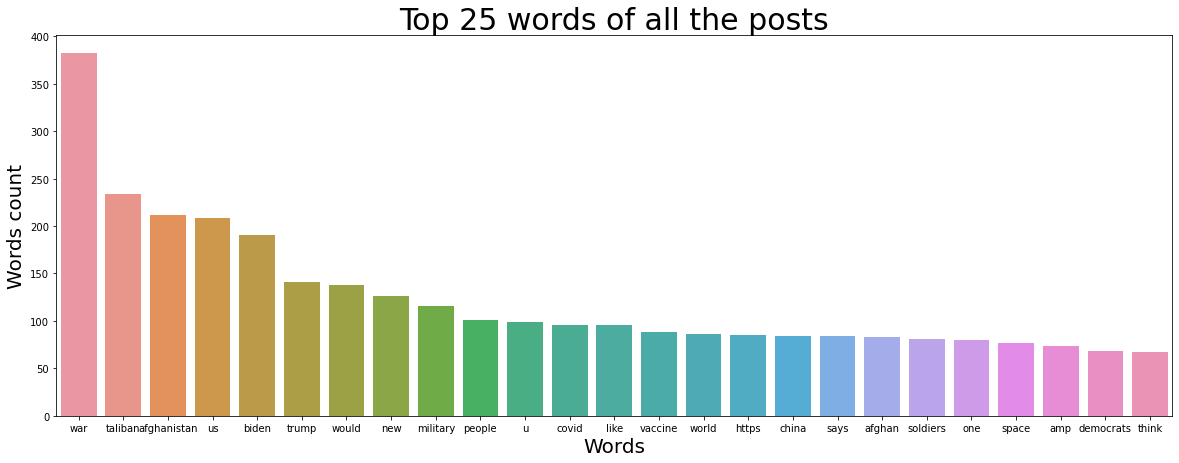

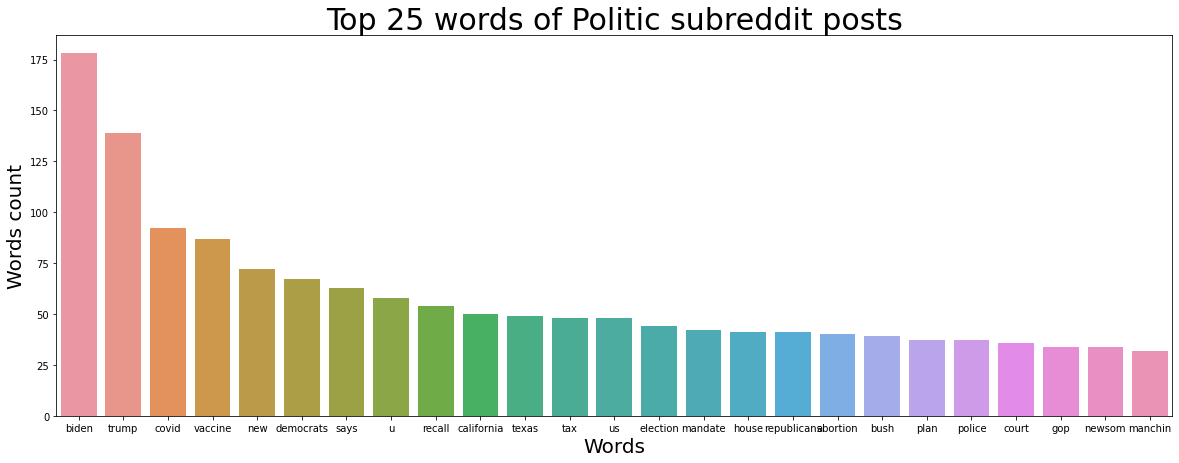

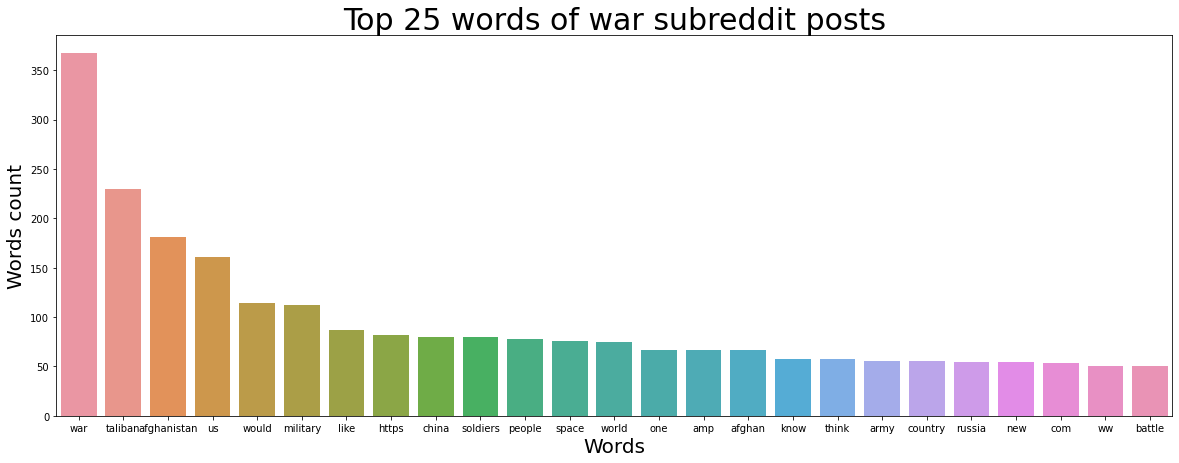

In [37]:
word_freq(df['message'],title_text='Top 25 words of all the posts',x_label='Words',y_label='Words count')
tempdf=pd.DataFrame(df['message'][df['subreddit'] == 0])
word_freq(tempdf['message'],title_text='Top 25 words of Politic subreddit posts',x_label='Words',y_label='Words count')
tempdf=pd.DataFrame(df['message'][df['subreddit'] == 1])
word_freq(tempdf['message'],title_text='Top 25 words of war subreddit posts',x_label='Words',y_label='Words count')

In [38]:
#lemmatize message to new column 'message_lemma'
def lemmatize(message):
    lemmatizer = nltk.WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'\w+')
    return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(message)]

df['message_lemma'] = df.message.apply(lemmatize)
df['message_lemma']= df['message_lemma'].str.join(' ')

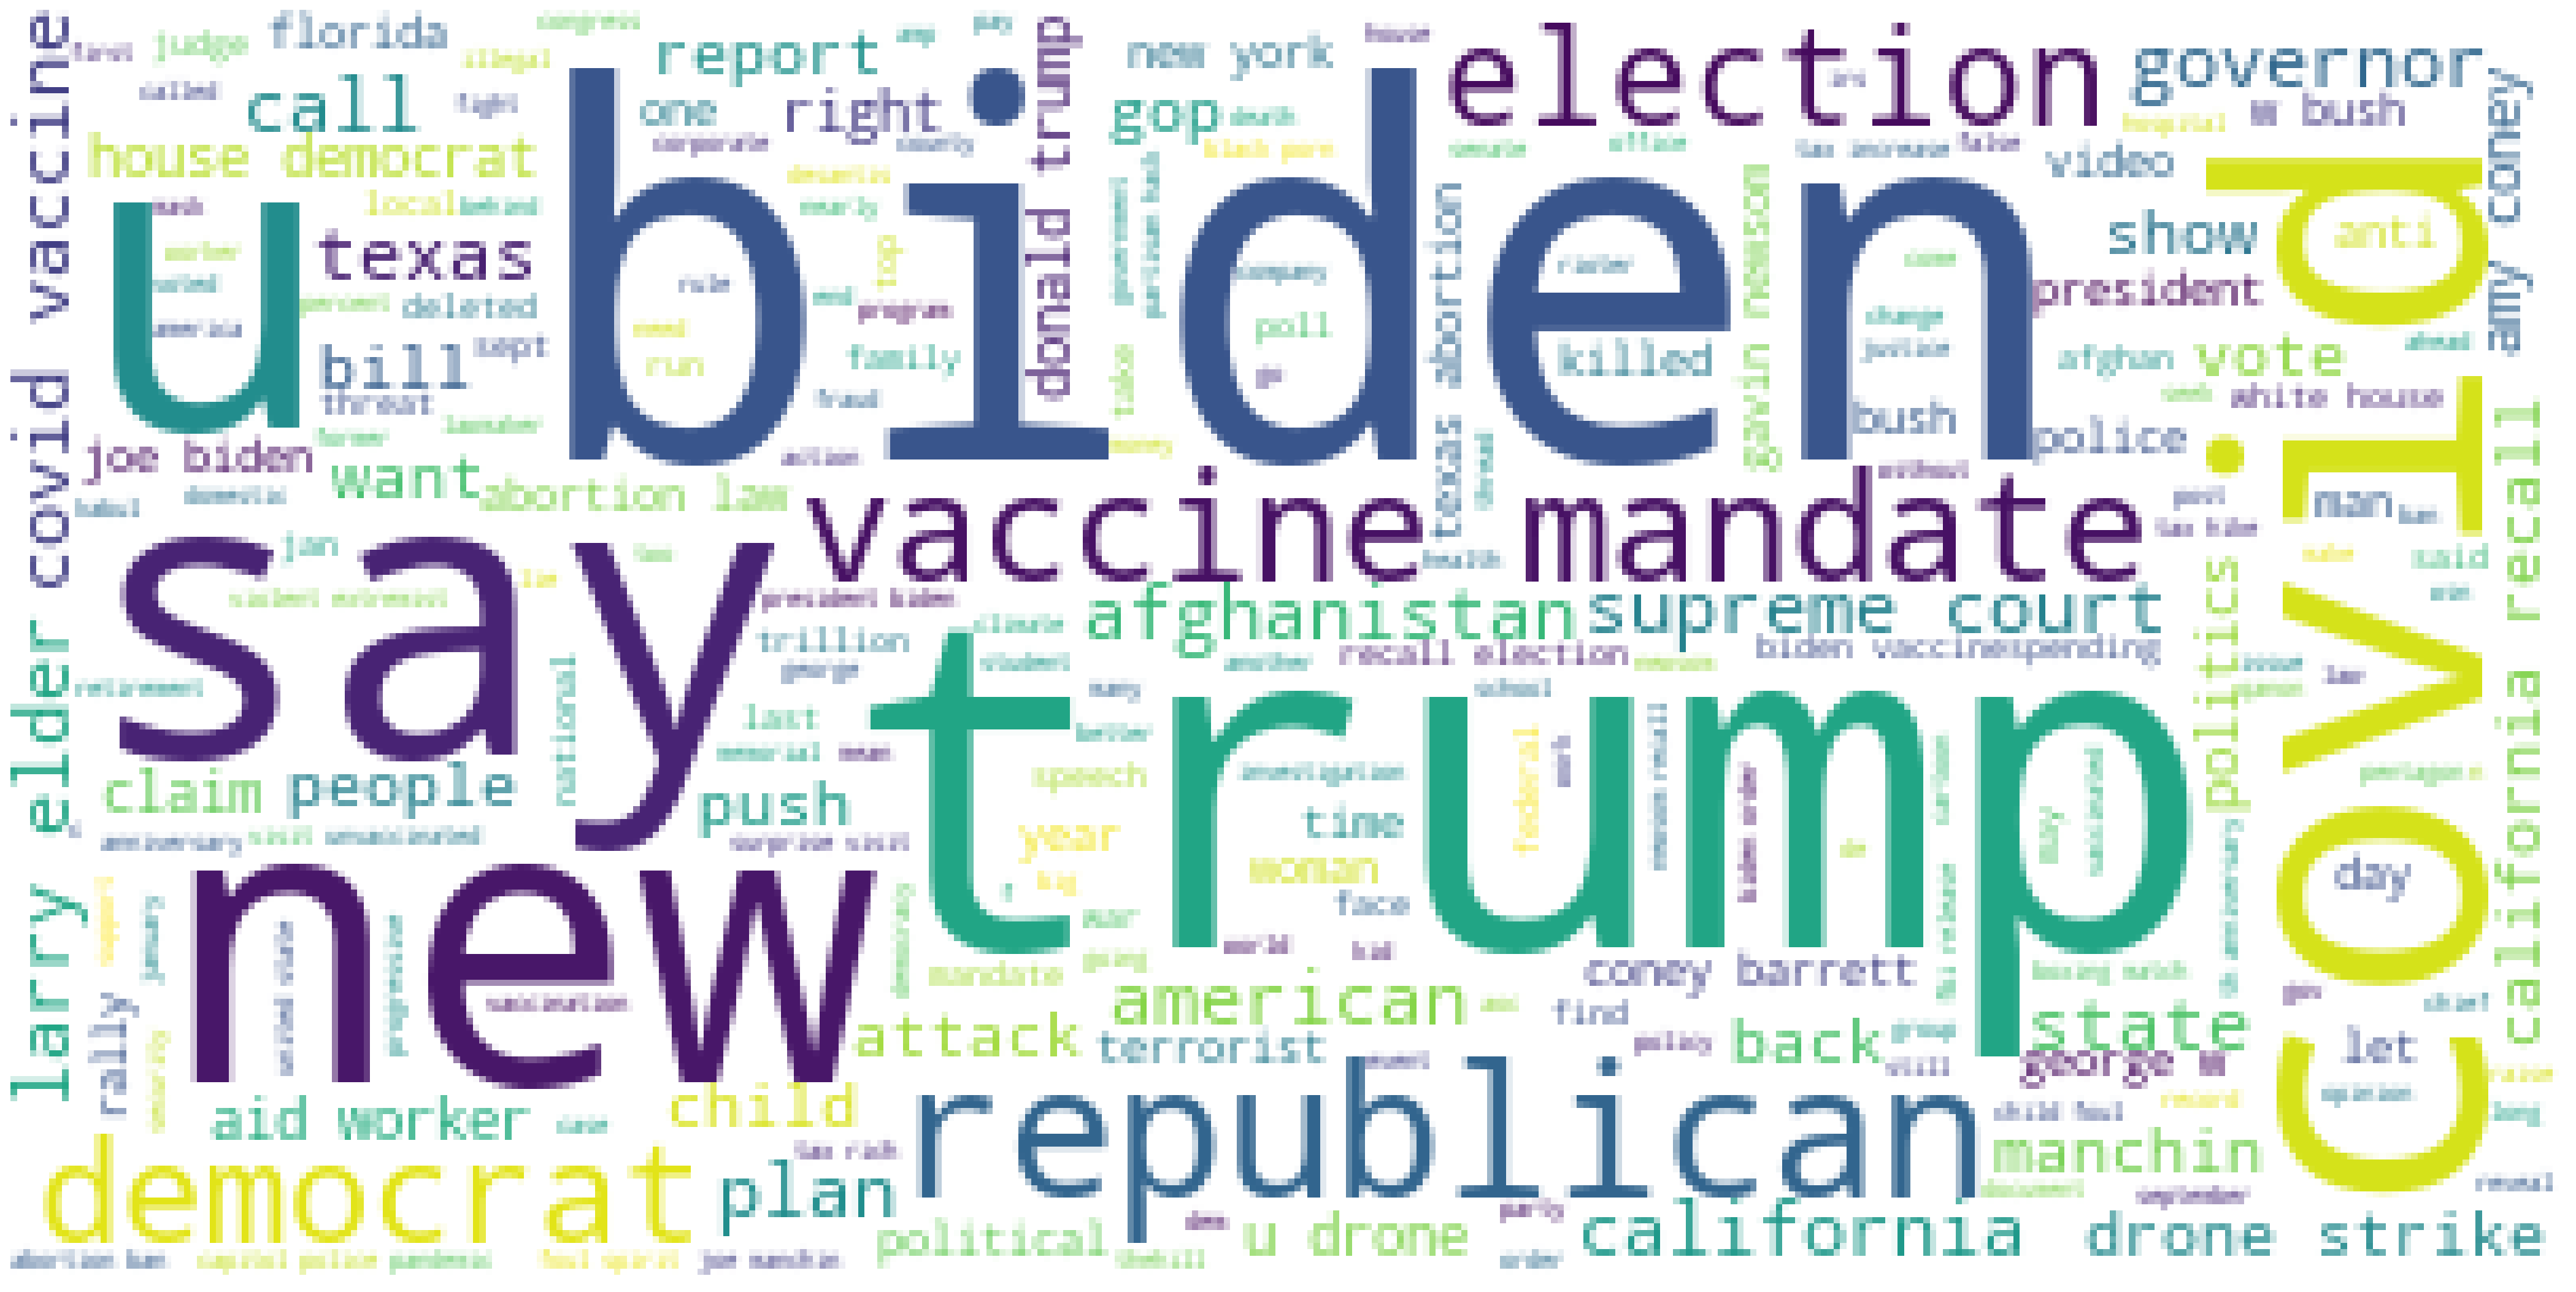

In [39]:
#Wordcloud visualisation
wordcloud2 = WordCloud(max_words=1000,background_color='white').generate(' '.join(df['message_lemma'][df['subreddit'] == 0]))
plt.figure(figsize=(75,75))
plt.imshow(wordcloud2, interpolation='nearest')
plt.axis("off")
plt.show()

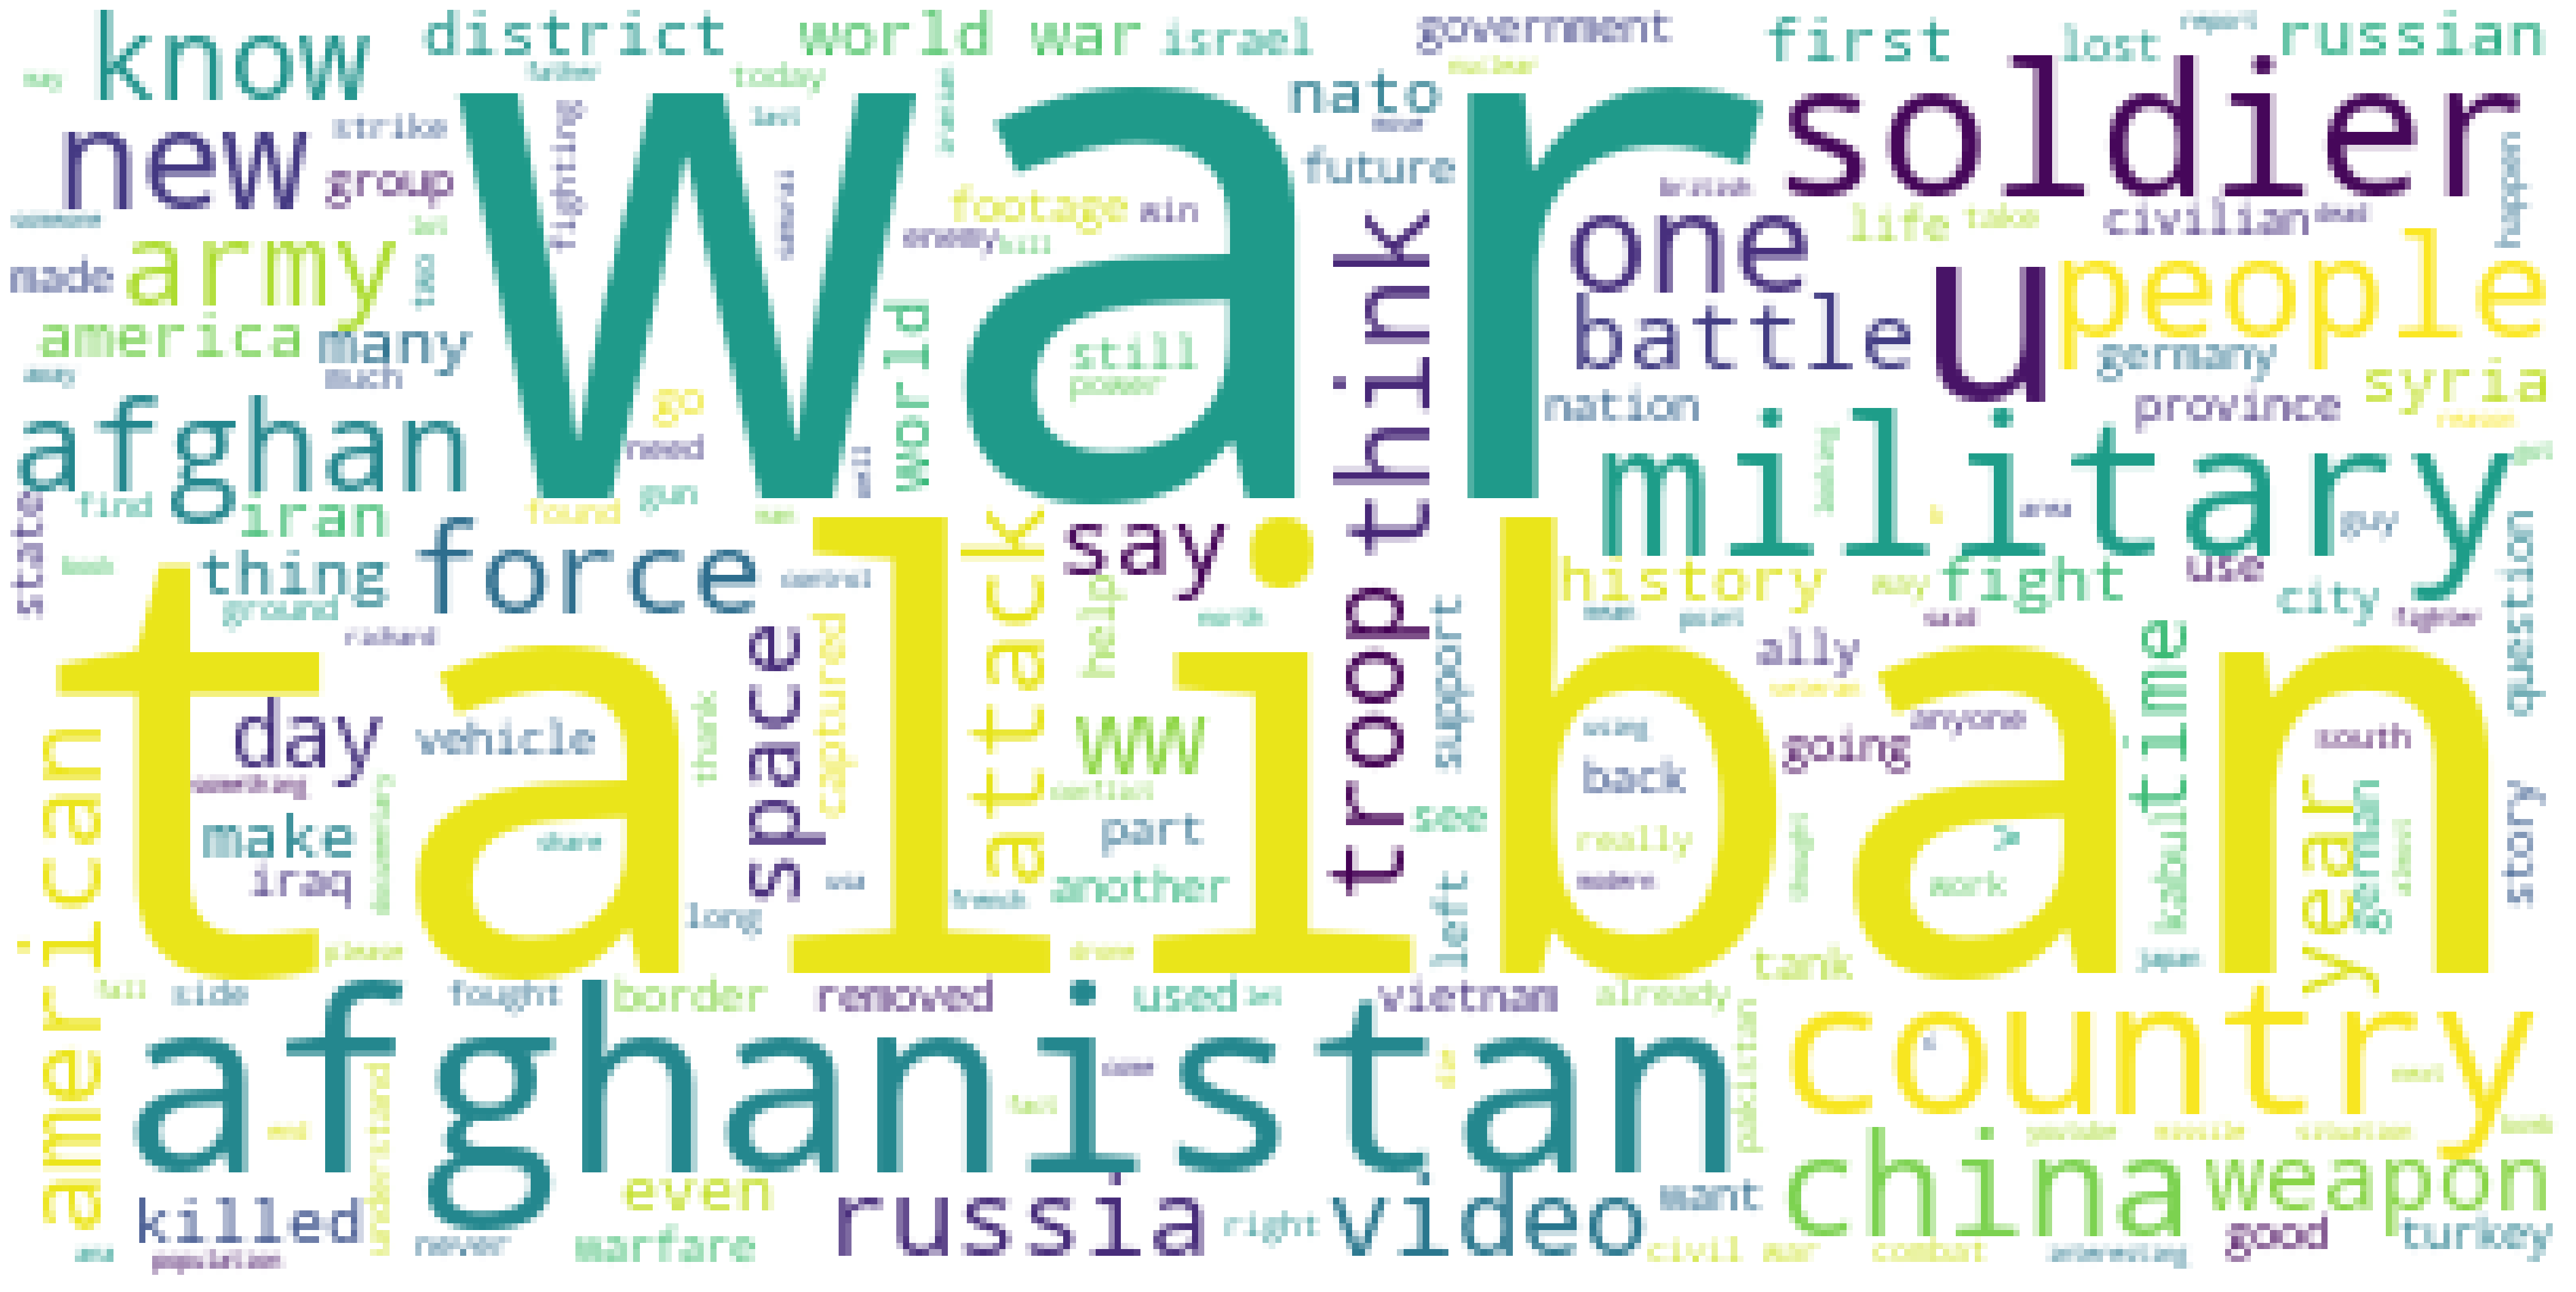

In [40]:
#Wordcloud visualisation
wordcloud2 = WordCloud(max_words=1000,background_color='white').generate(' '.join(df['message_lemma'][df['subreddit'] == 1]))
plt.figure(figsize=(75,75))
plt.imshow(wordcloud2, interpolation='nearest')
plt.axis("off")
plt.show()

In [41]:
df.head()

,subreddit,message,message_lemma
0,1,los cabos real estate oceanside real estate ca...,los cabos real estate oceanside real estate ca...
1,1,caption contest cant wait see input,caption contest cant wait see input
2,1,modern light infantry operate hi modern light ...,modern light infantry operate hi modern light ...
3,1,history development weaponry gaza pij al quds ...,history development weaponry gaza pij al quds ...
4,1,outbreak ww freshly mobilized soldiers zagreb ...,outbreak ww freshly mobilized soldier zagreb c...


In [42]:
df['num_words'] = df['message_lemma'].map(len)

In [43]:
df.head()

,subreddit,message,message_lemma,num_words
0,1,los cabos real estate oceanside real estate ca...,los cabos real estate oceanside real estate ca...,51
1,1,caption contest cant wait see input,caption contest cant wait see input,35
2,1,modern light infantry operate hi modern light ...,modern light infantry operate hi modern light ...,68
3,1,history development weaponry gaza pij al quds ...,history development weaponry gaza pij al quds ...,75
4,1,outbreak ww freshly mobilized soldiers zagreb ...,outbreak ww freshly mobilized soldier zagreb c...,86


In [44]:
df.groupby('subreddit')['num_words'].mean()

subreddit
0     63.884545
1    117.350000
Name: num_words, dtype: float64

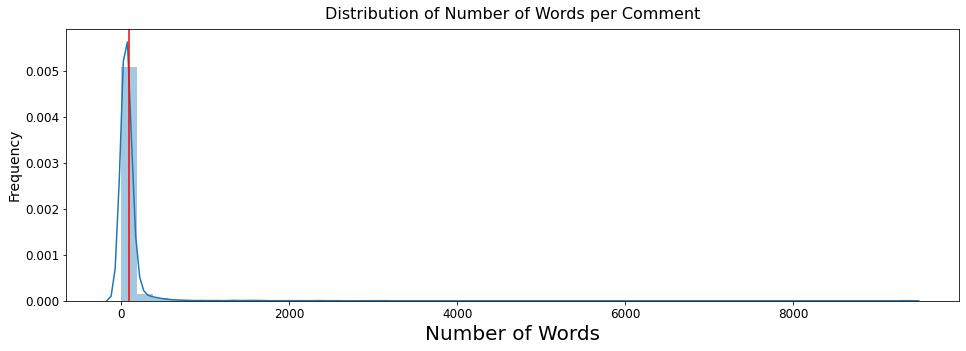

In [45]:
# Create distribution plot for num_words
plt.figure(figsize=(16,5))
plt.title('Distribution of Number of Words per Comment', size=16, pad=10)

sns.distplot(df['num_words'])
plt.axvline(df['num_words'].mean(), color='r', )

plt.xlabel('Number of Words', size=20)
plt.ylabel('Frequency', size=14)

plt.xticks(size=12)
plt.yticks(size=12);

In [46]:
df.head()

,subreddit,message,message_lemma,num_words
0,1,los cabos real estate oceanside real estate ca...,los cabos real estate oceanside real estate ca...,51
1,1,caption contest cant wait see input,caption contest cant wait see input,35
2,1,modern light infantry operate hi modern light ...,modern light infantry operate hi modern light ...,68
3,1,history development weaponry gaza pij al quds ...,history development weaponry gaza pij al quds ...,75
4,1,outbreak ww freshly mobilized soldiers zagreb ...,outbreak ww freshly mobilized soldier zagreb c...,86


In [47]:
df.to_csv('../data/final_table.csv',index=False)

In [48]:
df.isnull().sum()

subreddit        0
message          0
message_lemma    0
num_words        0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 1099
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subreddit      2200 non-null   int64 
 1   message        2200 non-null   object
 2   message_lemma  2200 non-null   object
 3   num_words      2200 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 150.5+ KB
